In [1]:
%load_ext autoreload
import pickle
import pandas as pd
from glob import glob
from pathlib import Path
import scipy.sparse as sp
from tqdm.notebook import tqdm
from gensim.models.word2vec import Word2Vec

import sys
sys.path.append('../../')

from src.packages.TPPMI.ppmi_model import PPMIModel
from src.packages.TPPMI.tppmi_model import TPPMIModel

from src.visualization.embedding_visualization import \
    plot_cosine_similarity_cade, plot_cosine_similarity_tppmi, print_most_similar_cade

## Setup

In [2]:
number_of_context_words = "2000"
ppmi_path = Path("../../data") / "ppmi-matrices" / "nyt-data" / number_of_context_words

## Load models

In [3]:
ppmi_data_files = sorted(glob(str(ppmi_path  / "*.npz")))
words_files = sorted(glob(str(ppmi_path  / "*.pkl")))

Split context-words from timestamped-vocabularies

In [4]:
context_words_file = [path for path in words_files if "context-words" in path]
ppmi_vocab_files = [path for path in words_files if "context-words" not in path]

In [5]:
ppmi_vocab_files

['../../data/ppmi-matrices/nyt-data/2000/ppmi-1990-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1991-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1992-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1993-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1994-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1995-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1996-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1997-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1998-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1999-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2000-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2001-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2002-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2003-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2004-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2005-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000

In [6]:
# Get ppmi-matrices and vocab
ppmi_matrices = {}

for filenames in zip(ppmi_vocab_files, ppmi_data_files):
    ppmi_matrix = sp.load_npz(filenames[1])
    with open(filenames[0], "rb") as f:
        vocab = pickle.load(f)
    key = filenames[0].split("ppmi-")[2][0:4]
    ppmi_matrices[key] = {"ppmi_matrix" : ppmi_matrix, "vocab": vocab}

# Get common context-words
with open(context_words_file[0], "rb") as f:
    context_words = pickle.load(f)

In [7]:
ppmi_matrices.keys()

dict_keys(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

Create ppmi_model objects

In [8]:
ppmi_models = {key: PPMIModel.construct_from_data(ppmi_data["ppmi_matrix"], ppmi_data["vocab"], context_words, normalize=True) for key, ppmi_data in ppmi_matrices.items()}

In [ ]:
tppmi_model = TPPMIModel(ppmi_models, dates="years", smooth=True)

  0%|          | 0/22062 [00:00<?, ?it/s]

In [15]:
print(f"Size of the vocabulary: {tppmi_model.get_vocabulary_size()}")

Size of the vocabulary: 22062


In [16]:
print(f"Size of the vocabulary: {tppmi_model.get_vocabulary_size()}")

Size of the vocabulary: 22062


In [20]:
%autoreload 2
from src.visualization.embedding_visualization import \
    plot_cosine_similarity_cade, plot_cosine_similarity_tppmi, print_most_similar_cade, plot_cosine_similarity_tppmi_2

## Presidents

In [29]:
target_word = "president"
test_words = ["obama", "clinton", "bush"]
elections = ["1992", "2000", "2008", "2016"]

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


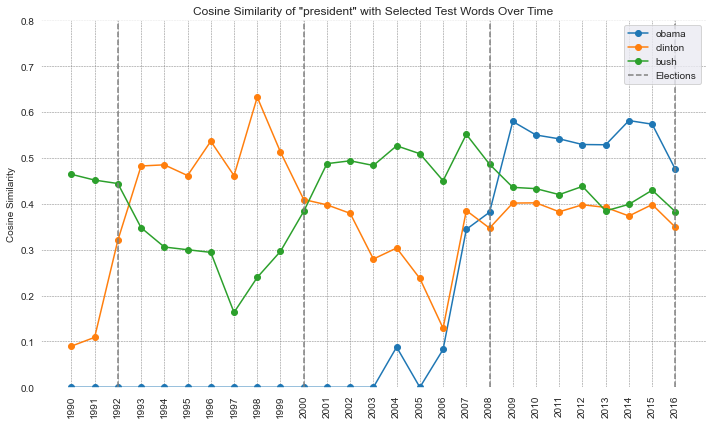

<Figure size 432x288 with 0 Axes>

In [30]:
plot_cosine_similarity_tppmi_2(target_word, test_words, tppmi_model, elections=elections)

## Global Conflicts

In [41]:
target_word = "war"
test_words = ["iraq", "afghanistan", "chechnya"]
selected_timesteps = [str(x) for x in range(1990, 2005)]

In [40]:
plot_cosine_similarity_tppmi_2(target_word, test_words, tppmi_model, selected_timesteps=selected_timesteps)

NameError: name 'plot_cosine_similarity_tppmi_3' is not defined

-------

In [25]:
pre = "2004"
post = "2012"
temp_pre = tppmi_model.ppmi_models[pre]
temp_post = tppmi_model.ppmi_models[post]
df_pre = temp_pre.get_as_df()
df_post = temp_post.get_as_df()

In [26]:
# Extract PPMI values for the target word "abortion"
target_word_1 = "bush"
target_word_2 = "obama"
ppmi_pre = df_pre.loc[target_word]
ppmi_post = df_post.loc[target_word_2]

# Combine into a single DataFrame for easier comparison
ppmi_comparison = pd.DataFrame({
    pre: ppmi_pre,
    post: ppmi_post
})

# Sort by PPMI values in descending order
ppmi_comparison_sorted = ppmi_comparison.sort_values(by=pre, ascending=False)

# Display top context words for "abortion"
ppmi_comparison_sorted.head(10)

,2004,2012
gulf,0.175804,0.038264
terror,0.175478,0.017917
civil,0.141463,0.000000
protests,0.137922,0.000000
bosnia,0.131564,0.000000
1991,0.128398,0.000000
terrorism,0.125045,0.000000
peace,0.118524,0.006173
holy,0.114050,0.000000
fought,0.112199,0.040563


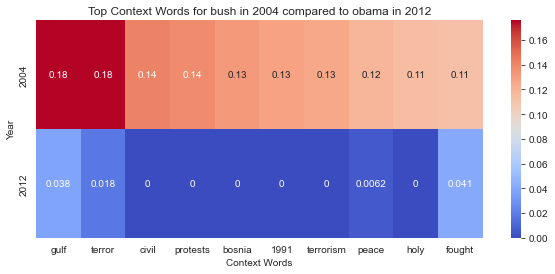

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top context words
top_context_words = ppmi_comparison_sorted.head(10).index

# Extract data for plotting
data_to_plot = ppmi_comparison_sorted.loc[top_context_words]

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(data_to_plot.T, annot=True, cmap='coolwarm')
plt.title(f'Top Context Words for {target_word_1} in {pre} compared to {target_word_2} in {post}')
plt.xlabel('Context Words')
plt.ylabel('Year')
plt.show()

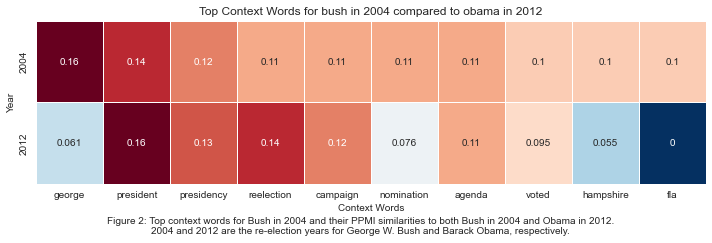

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_context_words_heatmap():
    # Define the data
    data = np.array([
        [0.16, 0.14, 0.12, 0.11, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1],
        [0.061, 0.16, 0.13, 0.14, 0.12, 0.076, 0.11, 0.095, 0.055, 0.0]
    ])

    # Define the labels
    context_words = ['george', 'president', 'presidency', 'reelection', 'campaign', 'nomination', 'agenda', 'voted', 'hampshire', 'fla']
    years = ['2004', '2012']

    # Create a DataFrame
    df = pd.DataFrame(data, columns=context_words, index=years)

    # Create the heatmap
    plt.figure(figsize=(12, 3))
    ax = sns.heatmap(df, annot=True, cmap='RdBu_r', cbar=False, linewidths=.5)

    # Set the labels and title
    ax.set_xlabel('Context Words')
    ax.set_ylabel('Year')
    ax.set_title('Top Context Words for bush in 2004 compared to obama in 2012')

    # Add the figure caption
    plt.figtext(0.5, -0.1, "Figure 2: Top context words for Bush in 2004 and their PPMI similarities to both Bush in 2004 and Obama in 2012.\n2004 and 2012 are the re-election years for George W. Bush and Barack Obama, respectively.", wrap=True, horizontalalignment='center', fontsize=10)

    plt.show()

# Call the function to create the plot
create_context_words_heatmap()


------------------------------------------------------------------------------------------------------------